## Step 1: Read and View Data 

In [45]:
# importing 
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Read in the data and view for any abnormalities
games = pd.read_csv('/Users/angeneris/Desktop/integrated_project_1/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [46]:
# Data cleaning- checking for any issues with the data 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Issues found: 

- Lots of null values, and not all columns match the amount of null values
- Year of release should be a datetime object, currently is float 
- Critic score should be int, currently is float 
- User score should be float, is object 
<br>



## Step 2: Data Cleaning

In [47]:
# Changing columns to lowercase and saving back to games 
games.columns = games.columns.str.lower()

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Dropping all null values from 'year_of_release' first because this column is extremely important to the analysis in this project. I'm also dropping them because there isn't another meaningful way to display this data alternatively if we proceed with the null values. 
<br>

- Why are the values missing? <br>
The values may be missing from the year_of_release because they are either so old or new that they may not have been processed correctly. We can find out more about this by reviewing all the other column data that shows up when we view a NaN year_of_release

<br> 
We will also cut out the rest of the null values for most of the columns to match the exact number of non- null values as year_of_release. The following columns will continue with null values that will be changes to a placeholder: 'critic_score', 'user_score' and 'rating'. These columns offer a bit more flexibility with continuing with null values.

In [48]:
# List of columns to clean by dropping null values
columns_to_clean = ['year_of_release', 'name', 'platform', 'genre', 'eu_sales', 'jp_sales', 'other_sales']

# Dropping null values from specified columns
games = games.dropna(subset=columns_to_clean)

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Looks good, all columns except for 'critic_score', 'user_score' and 'rating' now have 16444 non-null values. 

<br> 
Next, we'll move on to cleaning the column 'critic_score'
Then 'user_score' and finally, 'rating'

<br> 

- Why are there missing values?<br>
In these columns, the missing values have a more obvious reason- they just don't have a rating/ score yet. This could either be because the rating system started after the tracking of this data or because the rating has yet to processed or has never been completed. We can find more about these differences by reviewing just these columns with the year_of_release column to see if there are any patterns.

In [49]:
# Converting 'critic_score' to integer and handling missing values
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce').astype('Int64')

# Converting 'user_score' to float and handling missing values
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Converting year_of_release to int as datetime may be unecessary with only the year given

games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Filling missing values with placeholder -1 for ease of filtering later 
cols_to_fill = ['user_score', 'critic_score', 'rating']
games= games.fillna(value={'user_score': -1, 'critic_score': -1, 'rating': 'no rating'})

# Checking 
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [50]:
# Checking that there are no outliers in the data for 'critic_score' and 'user_score'
# critic_score should have a max of 100 and user_score max of 10
games[['critic_score','user_score']].max()

critic_score    98.0
user_score       9.7
dtype: Float64

In [51]:
# Creating a new column for total_revenue. This will combine sales revenue from all regions and add a new column to the dataframe
games['total_revenue'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no rating,0.01


In [52]:
# Checking 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no rating,31.38


The data has now been processed and is ready for analysis. 
<br>

## Step 3: Data Analysis 

#### Groping games by release year 

In [53]:
# Creating a dataframe for the amount of games released each year 
years = games.groupby('year_of_release').size().reset_index(name= 'games_released')
years

,year_of_release,games_released
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Looking at this dataframe above, it's clear that there was a 'boom' and a 'bust' period for video game sales by their year of release. The following data will be referred to as $['value']million USD 
<br> 

**1980 - 1982** <br> 
Sales Increase: The jump from the first game release year to the second "1980 - 1981" is understandable, as gaming became the next big thing and that trend seemed to last about 2 years before dropping again in 1983. 
<br> 

**1983 - 1990** <br> 
Sales Flucuate: The sales are sporadic in this period, could be due to changes in consumer behavior and devleopers testing out new games. Sales range from 16 with the highest point being 21 in 1986. 
<br>  

**1991 - 1994** <br> 
Sales Increase: Sales increase conservatively until they hit a boom, when sales double from 60 in 1993 to 121 in 1994.
<br> 

**1995 - 2002** <br> 
Sales Increase: Sales increase year after year at a significant level. 
<br> 

**2003 - 2004** <br> 
Sales Drop: Sales drop but not by much- almost stagnat in this short period. 
<br> 

**2005 - 2009** <br> 
Sales Increase: Sales pick up and are higher than ever: An almost entirely steady increase in sales year by year. 
<br> 

**2010 - 2016** <br> 
Sales Drop: There is a clear significant and steady decrease in sales year after year from this point forward. This suggest a strong change in the market or sales of this company. Although, this dataset may not give the full picture of 2016 data, this does match the trend seen above. 
<br> 

Sales drop all the way from $1,255million USD in 2010 to $502million USD  in 2016. 
<br>

The current data is trending towards a decline in sales and there is no suggestion from the data that this will increase without drastic market changes or company marketing and strategy.

##### Grouping Revenue by Platform 

In [54]:
# Grouping total_sales by platform and viewing the most popular first 
platform_revenue = games.groupby('platform')['total_revenue'].sum().reset_index(name='total_revenue').sort_values(by='total_revenue', ascending=False)
platform_revenue.head(5)

,platform,total_revenue
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


The most popular gaming platform within this dataset is PS2	with a total revenue of $1,233.56 million USD. We will continue analysis using this platform for a distribution model.

In [55]:
# Visually checking the distribution of total_revenue by year_of_release
ps2_sales = games[games['platform']=='PS2'].groupby('year_of_release')['total_revenue'].sum().reset_index(name='total_revenue')
ps2_sales

,year_of_release,total_revenue
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


From the above dataframe, it appears that there are only notable sales between 2000 - 2011. 

**The PS2 Platform peaked in popularity between 2001- 2005**

The platform had a significant boom after it's first release year then mostly continued to climb till sales began to drop in 2005, followed by a more drastic decline in 2007. This matches the trend expected as the PS3 was released in 2006. Consumers might have heard the news of this release around 2005 and started anticipating the following release. By 2010, it is extremely clear that the gaming system has in fact been replaced.

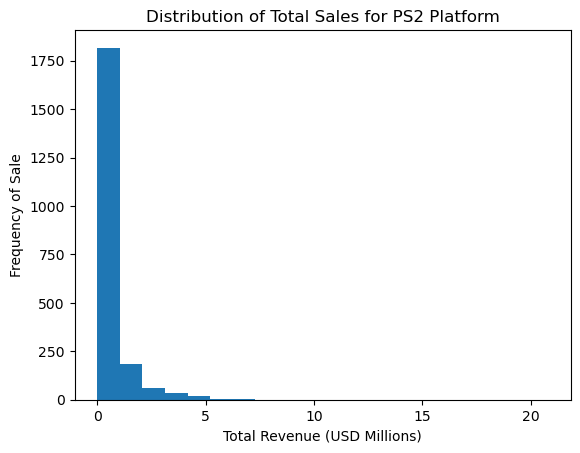

In [56]:
# Grouping PS2 data to plot a distribution 
ps2_data = games[games['platform'] == 'PS2']

# Plot distribution of total_revenue
plt.hist(ps2_data['total_revenue'], bins=20)  
plt.xlabel('Total Revenue (USD Millions)') 
plt.ylabel('Frequency of Sale') 
plt.title('Distribution of Total Sales for PS2 Platform')  
plt.show()

From the above histogram, you can see a positive, right skew. Although it is difficult to notice how long the right tail really is:

- You can imply that the mean is probably larger than the median, since there is such a large frequency of PS2 games with a smaller total revenue. 

- Secondary to the largest portion of this histogram, there is also a larger frequency in games that brought in slightly more revenue that 0-1 million. 

- There are hardly any visible instances of frequency in game sales that brought in more than 5 million USD.

In [57]:
# Mean Variance and std for this distribution using describe()
ps2_data[['na_sales','eu_sales','jp_sales','other_sales','total_revenue']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_revenue
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000
mean,0.269356,0.156385,0.064664,0.089549,0.579953
std,0.576756,0.360514,0.199480,0.340936,1.138461
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.010000,0.000000,0.000000,0.080000
50%,0.090000,0.050000,0.000000,0.020000,0.230000
75%,0.250000,0.140000,0.030000,0.070000,0.560000
max,9.430000,5.490000,3.610000,10.570000,20.810000


Using .describe() to view all the descriptive data for PS2 is an effective way to view many details all at once. 

- The mean of total_revenue across all regions is: 0.579953, suggesting that the majority of sales hover around this value.

- The standard deviation across all regions is: 1.138461, suggesting that there is large variation in the revenue data compared to the mean.

The min values show that there are occurences with 0 sales across all regions.
The max values show the highest sales are from "other_sales", suggesting that all other sales outside of the mentioned regions have the highest occurence of total revenue.

<b> Summary of Distribution

In summary, the positive, right skew of the distribution indicates a trend towards budget games that generate lower revenue per game. This trend contributes to the variability in the dataset, as there is a wider spread of revenue values among the lower revenue games compared to the higher revenue games.

The higher variance and standard deviation observed in the dataset show the spread of total revenue values and provide insights into the variability of revenue among PS2 games. The relatively high variance and standard deviation compared to the mean, suggest that the total revenue values for PS2 games are spread out over a wide range, with some games generating significantly higher revenue than others. 

The positive, right skew of the distribution contributes to this variability, as the long tail on the right side indicates a greater dispersion of higher revenue values

#### Popularity of Platforms Over Time

Before we continue, I found an issue in the data for the platform DS. After Aggregating total sales, first year released [min value of the year_of_release comlumn], and latest year released [max value of the year_of_release comlumn]for each platform, I found that the Platform 'DS' had a min. value of '1985' in it's first_year_released column. This is not possible, knowing that the platform first released in 2004. 

Below, I show the process of finding this issue and resolving it before continuing analysis:

In [58]:
# Changing the year for the problematic game
games.loc[games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

# Checking for the change
games[games['platform'] == 'DS'].sort_values(by='year_of_release')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
691,WarioWare Touched!,DS,2004,Puzzle,0.51,0.45,1.21,0.13,-1,-1.0,no rating,2.30
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,-1,-1.0,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,-1,-1.0,no rating,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,-1,-1.0,no rating,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,-1,-1.0,no rating,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,-1,-1.0,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,-1,-1.0,E10+,0.03
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,-1,-1.0,E,0.18
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,-1,-1.0,no rating,0.51


With these changes, we can continue and take  a look at the proper data. 

In [59]:
# Aggregating total sales, first year released, and latest year released for each platform
platform_stats = games.groupby('platform').agg({'total_revenue': ['count','sum'], 'year_of_release': ['min', 'max']}).reset_index()

# Renaming column
platform_stats.columns = ['platform', 'total_units_sold', 'total_revenue', 'first_year_released', 'latest_year_released']

# Sorting by total sales and selecting top 10 platforms
platform_stats.sort_values(by='total_units_sold', ascending=False).head(10)

,platform,total_units_sold,total_revenue,first_year_released,latest_year_released
16,PS2,2127,1233.56,2000,2011
4,DS,2121,802.78,2004,2013
17,PS3,1306,931.34,2006,2016
26,Wii,1286,891.18,2006,2016
28,X360,1232,961.24,2005,2016
19,PSP,1193,289.53,2004,2015
15,PS,1190,727.58,1994,2003
13,PC,957,255.76,1985,2016
6,GBA,811,312.88,2000,2007
29,XB,803,251.57,2000,2008


Above are the Top 10 performing platforms in sales of all time. This doesn't mean that platforms that didn't make the cut were less popular at their respective times, but limiting the data to the top 10 platforms this way will still provide a lot of value. Viewing the 'first_year_released' shows that the gaming platforms PC and PS, with data from it's first released games appearing before the 2000s, still made it to the Top 10. 
<br>

The **oldest** game platforms with highest sales and revenue are:
- PC (PC) 1985
- Playstation (PS) 1994
What's significant about these two platforms, is the stark difference in revenue. Although 10 years younger than the PC, the Playstation seems to be much more popular or at least more expensive to game on, to produce more than 3X the revenue of PC games in less time. 


The **top 5** game platforms of all time with both the highest total units sold and highest revenue:
- Playstation 2 (PS2)
- Nintendo DS (DS)
- Playstation 3 (PS3)
- Wii (Wii)
- XBOX 360 (X360)

The **top 5** game platforms of all time with the highest *total revenue* are:
- Playstation 2 (PS2)
- XBOX 360 (X360)
- Playstation 3 (PS3) 
- Wii (Wii)
- Nintendo DS (DS)

This comparison shows the top platforms and shows the significance of Playstation 2, which ranks the highest for both revenue and total units sold.

**Other noticeable insights:**
- There is an interesting relationship between the total_units_sold and total_revenue, between platforms that sell very similar amount of units. For example, PS2 and DS sold almost the exact amount of units, but the revenue is much higher for PS2. The same can be said for Wii and Xbox360, with Wii selling more units but bringing in less revenue. It's important to take into account the type of games that sell in each platforms and understand it's effects on game pricing. A likely explanation would be that games on Nintendo DS and Wii cater more towards childrens/family which tend to appeal to a more budget pricing than games on Playstation and Xbox, that cater more towards the avid gamer [Shooter/Action/Sports].

- Although Nintendo DS ranks 2nd highest among total units sold, it ranked lowest among the top 5 in revenue. This may be either due to it's age skewing the sales data or the fact that it just sells more, but cheaper games. 

- Playstation 3 is consistent in 3rd place and the Playstation brand is the only one listed twice amongst top platforms.


In [60]:
# Checking and ensuring that only the top 10 relevant platforms are included in further analysis 
platform_stats['relevant_period'] = platform_stats['latest_year_released'] - platform_stats['first_year_released']
platform_stats = platform_stats.sort_values(by='total_units_sold', ascending=False).head(10)
platform_stats

,platform,total_units_sold,total_revenue,first_year_released,latest_year_released,relevant_period
16,PS2,2127,1233.56,2000,2011,11
4,DS,2121,802.78,2004,2013,9
17,PS3,1306,931.34,2006,2016,10
26,Wii,1286,891.18,2006,2016,10
28,X360,1232,961.24,2005,2016,11
19,PSP,1193,289.53,2004,2015,11
15,PS,1190,727.58,1994,2003,9
13,PC,957,255.76,1985,2016,31
6,GBA,811,312.88,2000,2007,7
29,XB,803,251.57,2000,2008,8


From the above dataframe, there is a noticeable trend in the period of relevancy column 'relevant_period'. 
<br>

**The top platforms almost all had a relevant period of 11 or 10 years.** 

The mean of all platform relevancy periods is most likely to be around that number.

In [61]:
print(f"The mean period of relevancy for all platforms is: {platform_stats['relevant_period'].mean():.2f} years")

The mean period of relevancy for all platforms is: 11.70 years


The actual average relavant period above matches the predicted value. This is the average amount of time it takes for once  popular platforms to fade before a new platform takes over. 

## Preparing Data for Forecasting

#### Changes in dataframe from this point:

Moving forward, we will continue using data from the 10 platforms with the most relevant last year_of_release and saving all their data to a new 'relevant_platforms' dataframe. This ensures that we are only viewing data trends from relevant game platforms that have either released their latest game in the year 2016 or will be releasing it in 2016.
<br>

This is important in forecasting trends for the following year because the data will potentially show patterns that can benefit the 2017 planning. 

In [62]:
# Filtering data from games dataframe to a new dataframe for only the relevant platforms 
relevant_platforms = games[games['year_of_release'] >= 2015]

# Filtering data from platform_stats to a new dataframe for only the relevant platforms 
relevant_platforms_stats = platform_stats[platform_stats['latest_year_released'] >= 2015]

# Sorting the relevant platforms by total revenue in descending order
relevant_platforms = relevant_platforms.sort_values(by='total_revenue', ascending=False)

# Viewing the first 10 rows of this new dataframe
relevant_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,no rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,no rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1.0,no rating,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1,-1.0,no rating,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49


**Sales by total revenue are dominated by Playstation: with Playstation 4 at the top of all global sales.**

- PS4 appears [7/10 times] in the top 10 global sales. <br>

- Sales are followed by XOne [appearing 2/10 times] and 

- 3DS [1/10 times]. 

- The game 'Call of Duty: Black Ops 3' appears twice at the top of the global sales on two platforms: PS4 and XOne. Sales were about twice as high on PS4, suggesting it's the more popular platform for this game. 

- Other notable games franchises are FIFA and Uncharted, with both having two games from their prospective franchises in the top 10.This shows that these are popular games that may have a high turnover per year, with many customers buying the previous released game and latest release of the franchise in the same year. 

By Genre: 

-The most popular genre is: **Shooter** appearing [5/10] times in the Top 10, suggesting that this is a dominating genre of the past year. 



#### Analysis Using Platforms Expected to be Relevant in 2017 

In [63]:
# Creating two box plots with different views 
# Create a box plot with extreme outliers included 
platforms_box = px.box(relevant_platforms, x='platform', y= 'total_revenue')

# Update the y-axis title
platforms_box.update_layout(
    title="Total Revenue by Platform with Extreme Outliers Included",
    yaxis_title="Total Revenue",
    xaxis_title="Platform"
)

# Show the plot
platforms_box.show()

# Second box plot
# Creates a box plot with limit on y axis
platforms_box = px.box(relevant_platforms, x='platform', y='total_revenue')

# Update the y-axis title
platforms_box.update_layout(
    title="Total Revenue by Platform",
    yaxis_title="Total Revenue",
    xaxis_title="Platform"
)
# Set the y-axis limit to remove most outliers
platforms_box.update_yaxes(range=[0, 1.4])

# Show the plot
platforms_box.show()


The box plots above illustrates the distribution of total revenue generated by games across various gaming platforms. Each box represents the revenue distribution for a specific platform amongst the relevant platform. 

The first box plot cntains extreme outliers and the second box plot provides a detailed comparison of the average sales for each platform, excluding outliers. This distinction isimportant because outliers can significantly skew sales data for certain platforms [eg. PS4], while having little to no impact on others [e.g PSP].

Upon closer examination, while the actual total revenue values vary significantly among platforms, their shapes appear similar, with relatively consistent interquartile ranges and widely spread maximum outliers.

**On average, Most games bring in around $0.10 million USD or $100,000 total revenue per game:** 

- **The highest median revenue is for WiiU, at $0.21USD Million**. This indicates that, on average, games released on the WiiU platform tend to generate higher revenue compared to other platforms.

- **The median revenues for PS4, XOne, 3DS, X360, and WiiU** appear to be similar, suggesting that these platforms have comparable performance in terms of revenue generation.
 
- **The platforms with the largest outliers: PS4, XOne, 3DS**: This suggests that there is higher variability in the revenue of these platforms. In contrast, platforms with fewer outliers might show more consistent revenue patterns, indicating a more stable performance across games released on those platforms.

Platforms with higher median revenues and larger variability such as **PS4, XOne, 3DS** may represent lucrative opportunities for the company, while platforms with more stable revenue patterns may offer predictability and reliability.


In [64]:
# Average sales by platform for all games 
relevant_platforms_stats.groupby('platform')['total_revenue'].mean().sort_values(ascending=False).reset_index()

,platform,total_revenue
0,X360,961.24
1,PS3,931.34
2,Wii,891.18
3,PSP,289.53
4,PC,255.76


- The average revenue data suggests that the platforms that brought in the most revenue, on average, were: X360, PS3, and Wii, with average revenues ranging between $891.8 million to $961.24 million.

- This is followed closely by PS4 with an average revenue of $314.14 million, PSP with $289.53 million, 3DS with $257.81 million, and PC with $159.32 million.

In contrast, the platforms with the lowest average total revenue are XOne, WiiU, and PSV.

Overall, the average revenue data highlights that X360, PS3, and Wii generated the most revenue, averaging between $891.8 million and $961.24 million. However, the box plot analysis shows that while these platforms have high median revenues, they also exhibit variability in revenue generation, evident from the presence of outliers.

Platforms like PS4, XOne, and 3DS, with higher median revenues and larger variability, represent potential marketing opportunities.


#### Filtering Data by Critic Score and User Score 

In [65]:
# Look at how user and professional reviews affect sales for one popular platform 
# Group data for one latest platforms by critic_score and user_score, make sure to ignore '-1' placeholders
ps4_data = relevant_platforms[relevant_platforms['platform']== 'PS4']
ps4_data = ps4_data[(ps4_data['user_score'] != -1) & (ps4_data['critic_score'] != -1)]


# Create scatter plots for critic scores and user scores
scatter_critic = px.scatter(ps4_data, x='critic_score', y='total_revenue', 
                            title='Relationship between Critic Scores and Sales for PS4 Games',
                            labels={'critic_score': 'Critic Score', 'total_revenue': 'Total Revenue'})

scatter_user = px.scatter(ps4_data, x='user_score', y='total_revenue', 
                          title='Relationship between User Scores and Sales for PS4 Games',
                          labels={'user_score': 'User Score', 'total_revenue': 'Total Revenue'})

# Create a scatter plot including both critic scores and user scores
combined_scatter = px.scatter(ps4_data, x='critic_score', y='user_score', 
                              color='total_revenue', size='total_revenue', 
                              title='Relationship between Reviews and Sales for PS4 Games',
                              labels={'critic_score': 'Critic Score', 'user_score': 'User Score', 
                                      'total_revenue': 'Total Revenue'})

# Show all scatter plots 
scatter_critic.show()
scatter_user.show()
combined_scatter.show()

**Distribution of Critic Scores:**
Most data points fall within the range of 60-90 for critic scores.
There is a notable concentration of data points around these values, indicating common scores assigned by critics.
Impact of Critic Scores on Sales:
The lowest critic score of 19 corresponds to a relatively low revenue of 0.12. However, there are instances of low revenue even with higher critic scores.
- Critic score alone does not appear to be a strong predictor of revenue, as there are instances of both low and high revenue across a range of critic scores.
- All of the highest revenue values are associated with the highest critic scores, indicating a trend of higher sales for games with exceptional critic ratings.

Threshold for High Revenue:
- There are no instances of very high revenue for games with critic scores below 73. However, critic scores above 75 tend to vary from low revenue to very high revenue.

**Distribution of User Scores:**
Most data points are concentrated within the range of user scores 5-9, indicating common scores by users.
There is a notable scattering of data points across the range of user scores, suggesting a wider variation compared to critic scores.

Impact of User Scores on Sales:
- Low user scores generally appear to be associated with lower revenue, but there are instances of high revenue even with low user scores, indicating that user score alone may not be a strong predictor of sales.
- The majority of data points are closer to the x-axis, indicating lower revenue, but there are numerous outliers with higher revenue values.

Outliers and High Revenue:
- High outliers in revenue are observed across a range of user scores, from approximately 3.4 to 9.2. These outliers include instances of both relatively low and high user scores, suggesting that exceptionally high revenue can occur regardless of user score.

**Distribution of User Scores and Critic Scores** 
The plasma color gradient, ranging from dark blue or purple to bright yellow, represents the range of total revenue values. Darker colors indicate lower revenue values, while brighter colors represent higher revenue values. 
- Larger dots represent combinations of critic and user scores where more games have been rated.
- Smaller dots indicate combinations of critic and user scores where fewer games have been rated.

Distribution of Critic and User Scores:
- Most data points are clustered within the ranges of critic scores 60-93 and user scores 3.4-9.2, indicating common ratings assigned by critics and users.

- The highest revenue data point corresponds to a user score of 4.3 and a critic score of 82, with a total revenue of 8.58. - The second-highest revenue data point has a critic score of 87, user score of 6.5, and total revenue of 7.17.

Outliers and Low Revenue:
- There are outliers with lower revenue values present across the plot, indicating instances of games with exceptional performance or lower sales.
- The area around critic scores 60-70 appears to have more instances of higher user scores.

In [66]:
# Calculate the correlation between critic scores and total revenue
print("Correlation between Critic Score and Total Revenue:", ps4_data['critic_score'].corr(ps4_data['total_revenue']))

# Calculate the correlation between user scores and total revenue
print("Correlation between User Score and Total Revenue:", ps4_data['user_score'].corr(ps4_data['total_revenue']))

Correlation between Critic Score and Total Revenue: 0.3920741369660571
Correlation between User Score and Total Revenue: -0.06436843081030283


Critic Score: The correlation coefficient of 0.39 suggests a slightly positive correlation between critic scores and total revenue. 

User Score: The correlation coefficient of  -0.06 suggests a weak negative correlation between user scores and total revenue. 

Based on these correlation coefficients, it appears that critic scores have a more notable influence on total revenue compared to user scores for PS4 games. 

### Relationship between Sales and Platform by Game

In [67]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.
same_games = relevant_platforms.pivot_table(index='name', columns='platform', values='total_revenue', aggfunc='sum', fill_value=0)

# Calculate the total revenue per game across all platforms
same_games['Total'] = same_games.sum(axis=1)

# Sort by total revenue and get the top 10 games with the highest total revenue
top_10_games = same_games.sort_values(by='Total', ascending=False).head(10)

top_10_games

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Total
name,,,,,,,,,,,
Call of Duty: Black Ops 3,0.00,0.26,1.69,14.63,0.0,0.0,0.0,0.0,1.70,7.39,25.67
FIFA 16,0.00,0.20,2.70,8.58,0.0,0.0,0.0,0.0,1.57,3.25,16.30
Fallout 4,0.00,1.28,0.00,7.17,0.0,0.0,0.0,0.0,0.00,4.22,12.67
Star Wars Battlefront (2015),0.00,0.55,0.00,7.98,0.0,0.0,0.0,0.0,0.00,3.66,12.19
FIFA 17,0.00,0.12,0.73,7.60,0.0,0.0,0.0,0.0,0.38,2.65,11.48
NBA 2K16,0.00,0.10,0.73,3.87,0.0,0.0,0.0,0.0,0.94,2.34,7.98
Madden NFL 16,0.00,0.00,0.77,3.24,0.0,0.0,0.0,0.0,0.97,2.42,7.40
Pokemon Sun/Moon,7.14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,7.14
Call of Duty: Infinite Warfare,0.00,0.13,0.00,4.47,0.0,0.0,0.0,0.0,0.00,2.42,7.02


The table above shows the top 10 games that brought in the most revenue across all platforms.

What speaks to me most from this data is the obvious trends of zeros between a few specific  PSP, PSV Wii and WiiU, followed by an almost entirely zeroed out column for 3DS. These zeros illustrate that the top performing games are most commonly found across these platforms:

- PS4
- XOne
- X360
- PS3
- PC 

Just by viewing the titles, the trend continues: Shooters/Action/ Sports games appear to be the most popular, bring in the most revenue and are specifically available across the above platforms for a reason. 



In [68]:
top_10_games_reset = top_10_games.reset_index()

# Sort the DataFrame by Total revenue
top_10_games_sorted = top_10_games_reset.sort_values(by='Total')

# Create a grouped bar chart with game titles on the y-axis
fig = px.bar(top_10_games_sorted, x=['3DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'], y='name',
             labels={'value': 'Total Revenue (USD Millions)', 'name': 'Game', 'variable': 'Platform'},
             title='Relationship Sales of the Same Games Across Platforms')

fig.show()

In the above chart, it is clear that PS4 brings in the most revenue over all other platforms for the same game. This matches the trends seen in the previous analyis and shows that PS4 is the preffered platform. This chart brings more clarity to the question of whether the platform itself is bringing in more consumers or if the revenue for the platfor is simply higher due to a higher price point per game. It seems unlikely that the same game owuld be released and sold in the same year for significantly different prices though, so it's more likely that PS4 has become the prefered for the types of games that are most popular in 2016. 

The second most popular platform is seen to be Xbox One, creating a healthy competion for Playstation 

Another point to note, is that Nintendo 3DS reached the Top 10 platforms mainly due it's Pokemon Sun/Moon game- which show that it's very helpful for platfroms to have exclusive games to their platforms. 

### Relationship between Sales and Genre

In [69]:
# Plot general distribution of games by genre
# Creates histogram for distribution of games by genre
hist_genre = px.histogram(relevant_platforms, x='genre', 
                          title='Distribution of Games by Genre',
                          labels={'genre': 'Genre', 'count': 'Number of Games'})
hist_genre.show()

The most popular genre made by far is Action games.

The top games by game count are Action, Role-playing and Adventure. 

This checks out with the game trends of the year- with more action based games leading in revenue.

In [70]:
# Creates box plot for sales & genre with extreme outliers
box_genre = px.box(relevant_platforms, x='genre', y='total_revenue', 
                           title='Relationship between Sales and Genre',
                           labels={'genre': 'Genre', 'total_revenue': 'Total Revenue'})
box_genre.show()

# Create box plot for sales & genre without most outliers
box_genre = px.box(relevant_platforms, x='genre', y='total_revenue', 
                           title='Relationship between Sales and Genre',
                           labels={'genre': 'Genre', 'total_revenue': 'Total Revenue'})

# Set the y-axis limit to remove most outliers
box_genre.update_yaxes(range=[0, 4])

# box_genre.show()


 Although the most popular games made are action games, **the most revenue appears to be made by Shooters** on average. This difference is an immense one compared to the revenue made by other genres by far. 
 

 The most profitable genres on average, are: Shooters, Sports and Role-Playing

This all leads back to the underlying theme that these popular games are tied to brand loyaly to platforms that handle these types of games well, like PS4, Xbox One and Xbox360. It also may relate to the fact that the demographic buying these games are older, the games are quicker to finish compared to other types of storyline and are often apart of a saga, like of Call of Duty or FIFA. 


<b>Although Action games acount for the most amount of games, they appear to bring in the least amount of revenue per game. This could be due to the amount of games skewing the data. 

## Step 4: Creating a User Profile for Each Region

### Top Five Platforms by Region (NA, EU,JP)

In [71]:
# Aggregate data on regional sales after grouping by platform
platforms_by_region = relevant_platforms.groupby('platform').agg(total_na_sales=('na_sales', 'sum'),
                                                                 total_eu_sales=('eu_sales', 'sum'),
                                                                 total_jp_sales=('jp_sales', 'sum'),
                                                                 total=('total_revenue', 'sum'))

platforms_by_region = platforms_by_region.sort_values(by='total', ascending=False).reset_index()

# View only the top 5 platforms
top_5_platforms = platforms_by_region.head(5)
top_5_platforms

,platform,total_na_sales,total_eu_sales,total_jp_sales,total
0,PS4,63.86,83.54,12.05,188.15
1,XOne,50.30,28.10,0.18,86.29
2,3DS,10.31,7.39,23.55,42.92
3,WiiU,8.86,6.49,4.12,20.95
4,PS3,5.66,7.30,4.97,20.42


**As expected, PS4 is the top across all regions. It actually dominates the market with $188USDmillion sales across all regions**

**Top Platform in North America:**
- PS4 
- Followed very closely by Xbox One

The North American market almost shares an equal desire for PS4 and Xbox One 

**Top Platform in Europe:**
- PS4
The European market shows a *greater* desire for PS4 than North America. 

**Top Platform in Japan:**
- Nintendo DS
The Japanese market is mostly interested in the Japanese company Nintendo- with DS dominated it's sales. The PS4 is a runner up, but there is still a big gap. Sales overall in the Japanese market are significantly lower than Europe and NA.

### Top Five Genres by Region (NA, EU,JP)

In [72]:
# Aggregate data on regional sales after grouping by genre
genres_by_region = relevant_platforms.groupby('genre').agg(total_na_sales=('na_sales', 'sum'),
                                                                 total_eu_sales=('eu_sales', 'sum'),
                                                                 total_jp_sales=('jp_sales', 'sum'),
                                                                 total=('total_revenue', 'sum'))

genres_by_region = genres_by_region.sort_values(by='total', ascending=False).reset_index()

# View only the top 5 genres
top_5_genres = genres_by_region.head(5)
top_5_genres

,genre,total_na_sales,total_eu_sales,total_jp_sales,total
0,Shooter,48.18,40.28,3.79,105.73
1,Action,33.68,34.82,23.05,102.13
2,Sports,26.31,27.82,1.65,64.33
3,Role-Playing,19.82,17.21,13.41,55.82
4,Misc,5.58,4.26,3.19,14.17


**As expected, 'Shooters' is the top genre across all regions, followed closely by 'Action' games.**

**Top Genre in North America:**
- Shooter 

The North American market is dominated by Shooters, but almost shares an equal desire for Action and Sports as a close second choice.

**Top Platform in Europe:**
- Shooters
- Action and Sports are close second in this market more closely than North America due to their slightly lower interest in Shooters than NA region and slightly higher interest in Action and Sports than NA region. 

**Top Platform in Japan:**
- Action 
- Role- playing is a close second, with all other game genres having almost no relevancy


**The most interesting market differences:**

- North America and Europe have similar markets in genral, but Action and Sports games may do better in the European market due to cultural influences in what's popular. 

- The Japanese market is very interesting because Shooters are entirely irrelevant- this may be due to it's heavy reliance on Nintendo DS as a platform, as well as cultural influences on what's popular. 


In [73]:
# Regional totals
regions_totals = relevant_platforms[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
regions_totals.columns = ['region', 'total_sales']

regions_totals

,region,total_sales
0,na_sales,151.79
1,eu_sales,147.94
2,jp_sales,53.40


**The top Global Markets are North America and Europe, both leading at an almost identical high**

Another interesting point is that Japan is still able to bring in a decent amount in revenue, while only relying on game sales that mostly are for Nintendo DS. This shows a lot of potential in changes in their market if customers begin using other platforms more. 


#### Do ESRB ratings affect sales in individual regions?

In [74]:
# Aggregate data on regional sales after grouping by rating
rating_by_region = relevant_platforms.groupby('rating').agg(total_na_sales=('na_sales', 'sum'),
                                                                 total_eu_sales=('eu_sales', 'sum'),
                                                                 total_jp_sales=('jp_sales', 'sum'),
                                                                 total=('total_revenue', 'sum'))

rating_by_region = rating_by_region.sort_values(by='total', ascending=False).reset_index()

# Displaying only ratings- excluding 'no ratings'
rating_by_region

,rating,total_na_sales,total_eu_sales,total_jp_sales,total
0,no rating,37.44,35.71,32.89,117.17
1,M,47.03,45.54,4.29,111.10
2,E,26.59,34.83,5.25,75.24
3,T,22.86,20.32,7.70,57.73
4,E10+,17.87,11.54,3.27,36.68


***The Top Rating was 'no rating', if we simply ignore this data point for a moment, the top rating for games with an actual rating is 'M' for Mature**

This makes sense with the trend in shooter games being most popular.

**Ratings in Order of Toal Revenue:**

No Rating: Games with no rating perform well across all regions, with total sales reaching 117.17 million.

Mature (M): Mature-rated games show strong performance in North America and Europe, contributing significantly to total sales with 111.10 million. However, their sales are very low in Japan, totaling only 4.29 million.

Everyone (E): Games rated "Everyone" perform moderately well, with total sales of 75.24 million. They are particularly popular in Europe, followed by North America.

Teen (T): Teen-rated games achieve relatively balanced sales mostly in North America and Europe regions, totaling 57.73 million. 

Everyone 10+ (E10+): Games rated "Everyone 10+" have lower total sales compared to other ratings, reaching 36.68 million. They perform best in North America.


Most games in Japan appear to not go through the same rating process as North American and Europe. 

## Step 5: Test Hypotheses

### Testing Hypothesis to Determine Patterns for Average User Ratings 

H0: The null hypothesis is that the average user ratings of the Xbox One and PC platforms are equal
<br>
HA: The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are not equal.

The following code will provide more information:

In [75]:
# Average user ratings 
user_score_xone = relevant_platforms[relevant_platforms['platform'] == 'XOne']['user_score']
user_score_pc = relevant_platforms[relevant_platforms['platform'] == 'PC']['user_score']

# Setting alpha as 0.05 as a standard- if needed, we will change to a lower value to reduce false postives
alpha = 0.05
# Perform t-test for independent samples
t_statistic, p_value = st.ttest_ind(user_score_xone, user_score_pc, equal_var=True)  # Assuming equal variance

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. Average user ratings of Xbox One and PC platforms are not equal.")
else:
    print("Fail to reject the null hypothesis. Average user ratings of Xbox One and PC platforms are equal.")

T-statistic: -0.9842284619018564
P-value: 0.3258876032093123
Fail to reject the null hypothesis. Average user ratings of Xbox One and PC platforms are equal.


With a low T-statistic and high p-value relative to the data, we fail to reject the null hypothesis. 

H0: The null hypothesis is that the average user ratings for the Action and Sports genres are equal.
<br>
HA: The alternative hypothesis is that the average user ratings for the Action and Sports genres 
are not equal.

The following code will provide more information:

In [76]:
# Test Average user ratings for the Action and Sports genres are different.
# Average user ratings 
user_score_action = relevant_platforms[relevant_platforms['genre'] == 'Action']['user_score']
user_score_sports = relevant_platforms[relevant_platforms['genre'] == 'Sports']['user_score']

# Setting alpha as 0.01 due to Action games havign so many more games than Sports
alpha = 0.01
# Perform t-test for independent samples
t_statistic, p_value = st.ttest_ind(user_score_action, user_score_sports, equal_var=True)  # Assuming equal variance

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. Average user ratings of Action and Sports genres are not equal.")
else:
    print("Fail to reject the null hypothesis. Average user ratings of  Action and Sports genres are equal.")

T-statistic: -3.024846229606
P-value: 0.002606866688865409
Reject the null hypothesis. Average user ratings of Action and Sports genres are not equal.


The significance level chosen to test the hypotheses was set at alpha= 0.001. This decision was driven by the large disparity in the number of games between the Action and Sports genres. A smaller alpha in this case can ensure accurate testing by only picking up on significant differences in the data.

For this specific test, the null hypothesis was rejected. This outcome suggests that, even after accounting for the variation in the total number of games, there exists a statistically significant difference in user ratings between Action and Sports games.

## Step 6: General Conclusion

 
### Key Findings

- Top Trending Platform is PS4, followed by Xbox and Nintendo 3DS.
- The most popular genre is Shooters, followed by Action and Role-playing.
- The North American and European markets are the strongest and most similar.
- The Japanese market is heavily influenced by Nintendo

### Recommendations for Future Planning

**Genre-Specific Marketing:** 
Continue franchise promotions for Call of Duty, FIFA, and Fallout to boost sales.
Focus on promoting Action, Role-Playing, Platform, and Simulation games across all regions to expand on these popular genres that tend to bring in lower revenue per game.

**Platform-Specific Campaigns:**

Invest in marketing for upcoming PS4 and Xbox One games that align with popular genres.
Increase promotion for Nintendo platforms in North America and Europe.
Focus on promoting platforms beyond Nintendo in Japan to diversify genre preferences.

**Genre Focus**

Prioritize marketing efforts for top Shooter, Action, and Sports games in North American and European markets.

**Regional Expansion**

Expand the Japan market by introducing more platform variety and diverse genres to cater to different preferences.

